### Try to find the best filter criteria for "genre" and "vartag" tags in metadata 

In [ ]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

In [ ]:
client = MongoClient(os.environ['MSC_MONGO_PERSONAL_URI'])
col = client.jamendo.songMetadata

In [195]:
genre_list = [tr['musicinfo']['tags']['genres'] for tr in col.find({})]
genre_count = Counter(chain(*genre_list))

In [212]:
# Filter small values
genre_count = {k:v for k,v in genre_count.items() if v > 200}
genre_list = [[i for i in x if i in genre_count.keys()] for x in genre_list]

In [213]:
from itertools import combinations

edges = Counter(chain(*[list(combinations(g,2)) for g in genre_list]))
nodes = genre_count

In [214]:
weighted_edges = [(*k,v) for k,v in edges.items()]

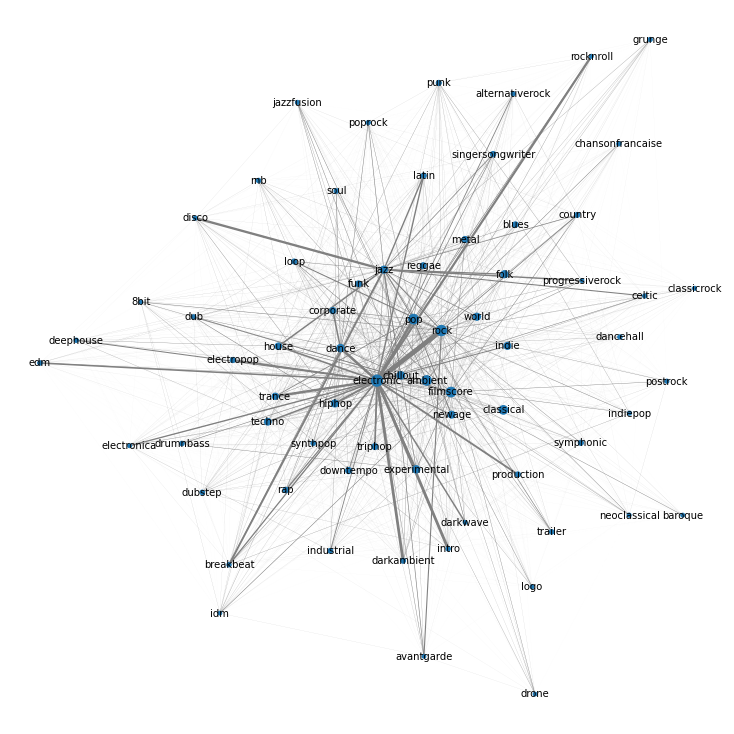

In [225]:
import networkx as nx

G = nx.Graph()
#G.add_nodes_from(nodes)
for k,v in nodes.items():
    G.add_node(k,weight=v)
G.add_weighted_edges_from(weighted_edges)

plt.figure(figsize=(10,10))
nx.draw(G, layout=nx.spring_layout,k=0.3*1/np.sqrt(len(G.nodes())), \
        with_labels=True, \
        font_size=10, \
        font_color = "black", \
        edge_color="grey", \
        node_size=[n**0.5 for n in nodes.values()], \
        width=[e/max(edges.values())**0.8 for e in edges.values()])

In [ ]:
genre_list = [tr['musicinfo']['tags']['genres'] for tr in col.find({})]
genre_count = Counter(chain(*genre_list))

In [236]:
var_list = [tr['musicinfo']['tags']['vartags'] for tr in col.find({})]
var_count = Counter(chain(*var_list))

In [ ]:
var_edges = Counter(chain(*[list(combinations(g,2)) for g in var_list]))
var_nodes = var_count

var_weighted_edges = [(*k,v) for k,v in var_edges.items()]

G_var = nx.Graph()
#G.add_nodes_from(nodes)
for k,v in var_nodes.items():
    G.add_node(k,weight=v)
G.add_weighted_edges_from(var_weighted_edges)

plt.figure(figsize=(10,10))
nx.draw(G, layout=nx.spring_layout,k=0.3*1/np.sqrt(len(G.var_nodes())), \
        with_labels=True, \
        font_size=10, \
        font_color = "black", \
        edge_color="grey", \
        node_size=[n**0.5 for n in var_nodes.values()], \
        width=[e/max(var_edges.values())**0.8 for e in var_edges.values()])

In [ ]:
var_count